# IDM仿真

In [2]:
import math
import matplotlib.pyplot as plt
#步长
dt=0.01
A_i=4
v_f=30
δ=2
l=6
s_0=8
s_1=0
T_i=1.1
b_i=4

In [ ]:
class Vehicle:#定义
    def __init__(self,ID=0,T=10,S=0,V=0,A=0,X=0):
        self.ID=ID
        self.s=[S for t in range(T)]
        self.v=[V for t in range(T)]
        self.a=[A for t in range(T)]
        self.x=[S*(-ID) for t in range(T)]

In [8]:
def IDM(s=20,v1=0,v0=0):#IDM模型求加速度
    a=A_i*(1-math.pow((v1/v_f),δ)-math.pow(((Sit(v1,v0)-l)/(s-l)),2))
    return a

In [9]:
def Sit(v1=0,v0=0):#期望车距函数
    Sx=s_0+s_1*math.pow((v1/v_f),0.5)+T_i*v1+(v1*(v1-v0))/(2*math.pow(A_i*b_i,0.5))
    return Sx

In [3]:
math.pow(0,0.5)

0.0

In [15]:
def Simulation(n=20,T=10,S=0,V=0,A=0,X=0):#仿真
    #初始化
    T=int(T/dt)
    Vehicles=[Vehicle(i,T,S,V,A,X) for i in range(n)]
    for t in range(T-1):
        if t <=10/dt:#前10秒按照20m/s平稳运行
            for i in range(n):
                Vehicles[i].s[t]=S
                Vehicles[i].v[t]=V
                Vehicles[i].a[t]=A
        if 10/dt<t<=11/dt:#减速
            Vehicles[0].a[t]=-1
        if 21/dt<t<=22/dt:#加速
            Vehicles[0].a[t]=1
        for i in range(n):
            W=Vehicles[i]
            W.x[t+1]=W.x[t]+W.v[t]*dt+0.5*W.a[t]*dt*dt
            W.v[t+1]=W.v[t]+W.a[t]*dt
            if i!=0:
                W.a[t+1]=IDM(W.s[t],W.v[t],Vehicles[i-1].v[t])
                W.s[t+1]=Vehicles[i-1].x[t]-W.x[t]
    return Vehicles

In [6]:
def Visual(Results,n,T):#可视化
    T=int(T/dt)
    x=[t for t in range(T)]
    Y1=[Results[i].x for i in range(n)]
    Y2=[Results[i].v for i in range(n)]
    Y3=[Results[i].a for i in range(n)]
    plt.rcParams["font.family"] = 'Arial Unicode MS'
    plt.figure(figsize=(15,10))
    plt.title("位移-时间")
    for i in range(n):
        plt.plot(x,Y1[i])
    #plt.show()
    plt.figure(figsize=(15,10))
    plt.title("速度-时间")
    for i in range(n):
        plt.plot(x,Y2[i])
    #plt.show()
    plt.figure(figsize=(15,10))
    plt.title("加速度-时间")
    for i in range(n):
        plt.plot(x,Y3[i])
    plt.show()

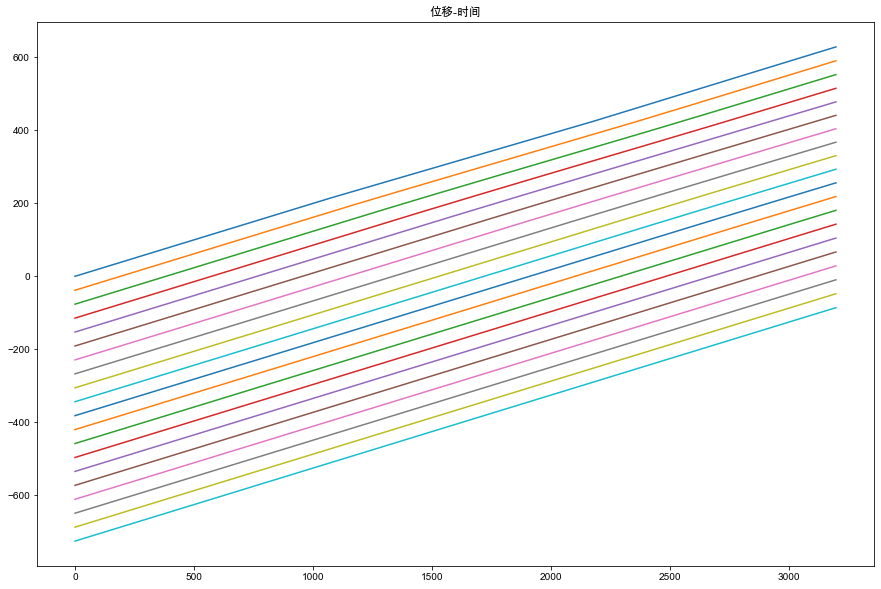

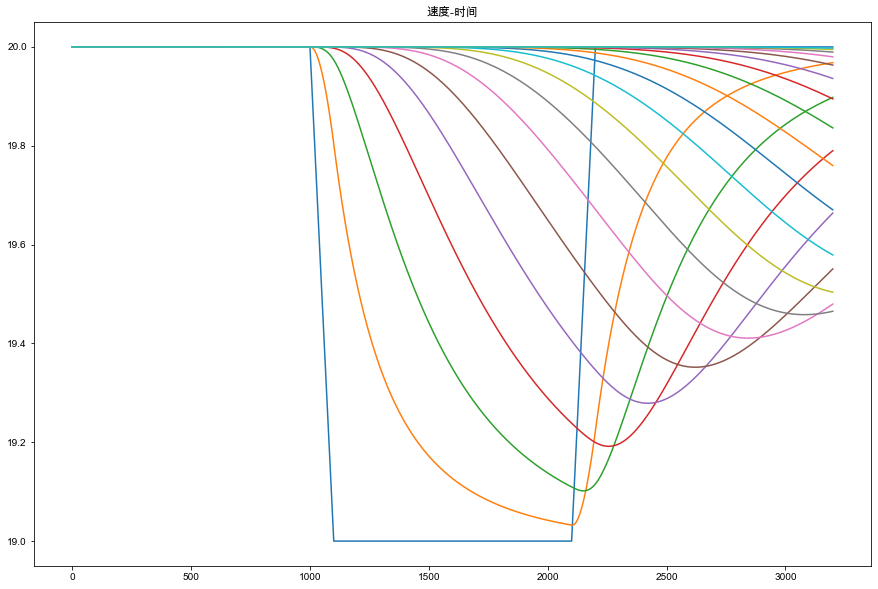

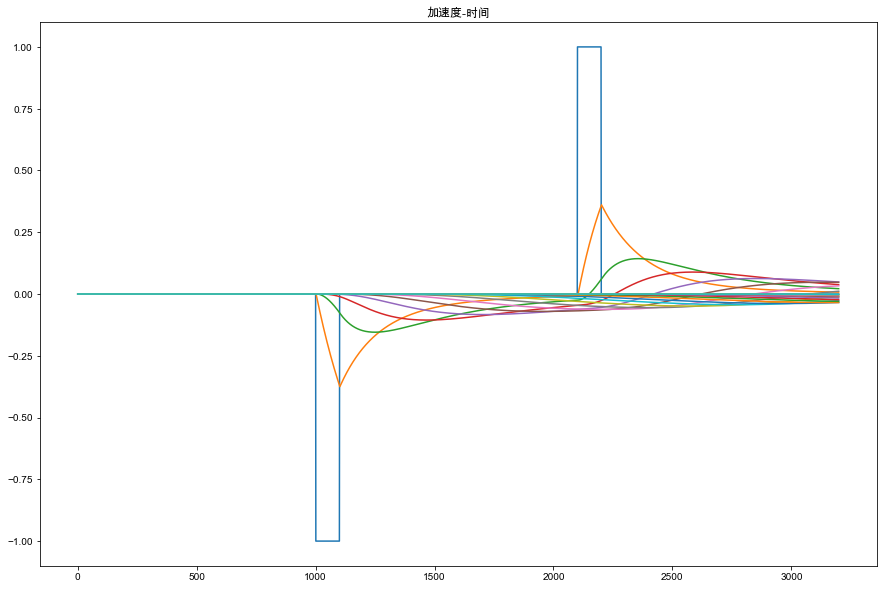

In [16]:
n=20
T=32
S=38.1994
V=20
A=0
Results=Simulation(n,T,S,V,A)
Visual(Results,n,T)

> Sofarja@outlook.com
>
> ---
>
> 21018116
>
> 郭艺铧
>
> 交通工程